In [1]:
#Load librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.layers import merge
from sklearn.metrics import mean_absolute_error
from keras.constraints import non_neg

warnings.filterwarnings('ignore')

%matplotlib inline

Using TensorFlow backend.


In [3]:
# Load movielens dataset
dataset = pd.read_csv("u.data",sep='\t',names="user_id,item_id,rating,timestamp".split(","))

In [4]:
#Examine data
dataset.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
#Check dimension
len(dataset.user_id.unique()), len(dataset.item_id.unique())

(943, 1682)

In [6]:
#Set category factors
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values

In [7]:
#Examine data
dataset.head()

,user_id,item_id,rating,timestamp
0,195,241,3,881250949
1,185,301,3,891717742
2,21,376,1,878887116
3,243,50,2,880606923
4,165,345,1,886397596


In [8]:
#Split data
train, test = train_test_split(dataset, test_size=0.2)

In [9]:
# Select dimension for embeding
n_users, n_movies = len(dataset.user_id.unique()), len(dataset.item_id.unique())
n_latent_factors = 3

In [10]:
# Prepare model
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

prod = keras.layers.dot([movie_vec, user_vec],axes = -1,name='DotProduct')
model = keras.Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

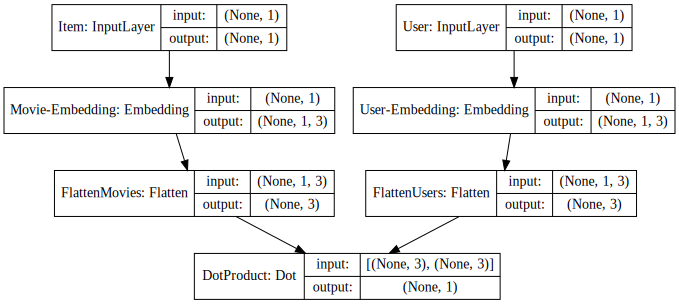

In [11]:
# Plot model
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [12]:
# Model summary
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 3)         5049        Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         2832        User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [13]:
# Train model
history = model.fit([train.user_id, train.item_id], train.rating, epochs=100, verbose=1)

Epoch 1/100
80000/80000 [==============================] - 5s 66us/step - loss: 12.0840
Epoch 2/100
80000/80000 [==============================] - 4s 55us/step - loss: 4.6000
Epoch 3/100
80000/80000 [==============================] - 4s 55us/step - loss: 1.9440
Epoch 4/100
80000/80000 [==============================] - 4s 55us/step - loss: 1.3172
Epoch 5/100
80000/80000 [==============================] - 4s 55us/step - loss: 1.0847
Epoch 6/100
80000/80000 [==============================] - 4s 55us/step - loss: 0.9836
Epoch 7/100
80000/80000 [==============================] - 4s 55us/step - loss: 0.9355
Epoch 8/100
80000/80000 [==============================] - 4s 55us/step - loss: 0.9100
Epoch 9/100
80000/80000 [==============================] - 4s 55us/step - loss: 0.8950
Epoch 10/100
80000/80000 [==============================] - 4s 55us/step - loss: 0.8856
Epoch 11/100
80000/80000 [==============================] - 4s 55us/step - loss: 0.8791
Epoch 12/100
80000/80000 [==============

Text(0, 0.5, 'Train Error')

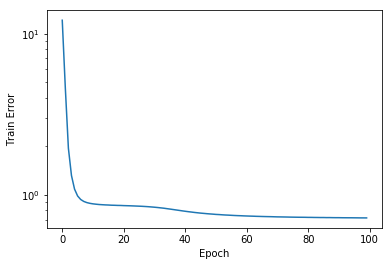

In [14]:
# Plot traning process
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [15]:
#Predict for test dataset
y_hat = np.round(model.predict([test.user_id, test.item_id]),0)
y_true = test.rating

In [16]:
# Calculate accuracy
mean_absolute_error(y_true, y_hat)

0.7002